In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
%store -r df_synthetic_results_metric
df_synthetic_results_metric.to_csv('results_synthData_metrics.csv', index=False)
df_synthetic_results_metric

,method,ITE,ATE,metrics
0,S-Learner LR,"[1.999999999999998, 1.9999999999999987, 1.9999...",2.000000,"[1.698796199394374e-30, 1.2862177740158606e-15..."
1,XGBTRegressor,"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]",2.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
2,BaseTRegressor XGB,"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]",2.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
3,BaseTRegressor LR,"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]",2.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
4,BaseXRegressor XGB,"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]",2.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
5,BaseXRegressor LR,"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]",2.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
6,BaseXRegressor XGB (without propensity score),"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]",2.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
7,BaseXRegressor LR (without propensity score),"[2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0]",2.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
8,BaseRRegressor XGB,"[3.6223648294253508e-06, 3.6223648294253508e-0...",0.000004,"[3.9999855105538034, 1.9999963776351706, 1.999..."
9,BaseRRegressor LR,"[-2.9272906491754958, 0.7035801392352368, 1.20...",0.963643,"[1.415439487411538, 1.036357273412645, 1.18972..."


In [2]:
bpi2017_result = pd.read_csv("df_results_types.csv")
#%store bpi2017_result
bpi2017_result

,method,ATE,ITE,Library,Method Type
0,Linear Regression,0.449046,NaN,DoWhy,Linear Regression
1,Double ML,0.471019,"[0.0, 0.0, 0.0, 0.9730893270729309, 1.24351258...",DoWhy,DML?
2,IPW,0.311352,NaN,DoWhy,IPW
3,IPW Hajek,0.311352,NaN,DoWhy,IPW
4,IPW Stabalized,0.311352,NaN,DoWhy,IPW
5,Propensity Score Matching,-0.179289,NaN,DoWhy,Matching
6,Distance Matching,0.630322,NaN,DoWhy,Matching
7,IPW LR,0.149171,NaN,Causallib,IPW
8,CausalEGM,0.160551,"[-0.5625, 0.07421875, 0.16796875, 0.236328125,...",CausalEGM,Deep Learning
9,Causal Tree,0.034357,"[-0.7879656160458453, -0.043494462980468274, 0...",CausalML,Uplift


In [3]:
bpi2017_result = bpi2017_result.drop(bpi2017_result.index[:2])
bpi2017_result

,method,ATE,ITE,Library,Method Type
2,IPW,0.311352,NaN,DoWhy,IPW
3,IPW Hajek,0.311352,NaN,DoWhy,IPW
4,IPW Stabalized,0.311352,NaN,DoWhy,IPW
5,Propensity Score Matching,-0.179289,NaN,DoWhy,Matching
6,Distance Matching,0.630322,NaN,DoWhy,Matching
7,IPW LR,0.149171,NaN,Causallib,IPW
8,CausalEGM,0.160551,"[-0.5625, 0.07421875, 0.16796875, 0.236328125,...",CausalEGM,Deep Learning
9,Causal Tree,0.034357,"[-0.7879656160458453, -0.043494462980468274, 0...",CausalML,Uplift
10,Causal Forest (mse),0.087938,"[-0.5945348148740174, 0.10957277598486484, 0.2...",CausalML,Uplift
11,Causal Forest (causal mse),0.301958,"[-0.13110388553923152, -0.00950147890263294, 0...",CausalML,Uplift


In [7]:
ate_mean = bpi2017_result["ATE"].mean()
ate_median = bpi2017_result["ATE"].median()
ate_std = bpi2017_result["ATE"].std()
print(ate_mean, ate_median, ate_std)

0.15287364865122013 0.09101823156545966 0.18904833433718254


In [13]:
values_between_quartiles = 0
row_first_quartile = bpi2017_result["ATE"].quantile(0.25)
row_third_quartile = bpi2017_result["ATE"].quantile(0.75)

# Count how many values lie between the first and third quartiles
for ate in bpi2017_result["ATE"]:
    if (ate > row_first_quartile) & (ate < row_third_quartile):
        values_between_quartiles+=1
values_between_quartiles

16

In [11]:
%store -r bpi2017_result

In [12]:
bpi2017_result.to_csv('df_results_types.csv', index=False)

### Plots

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

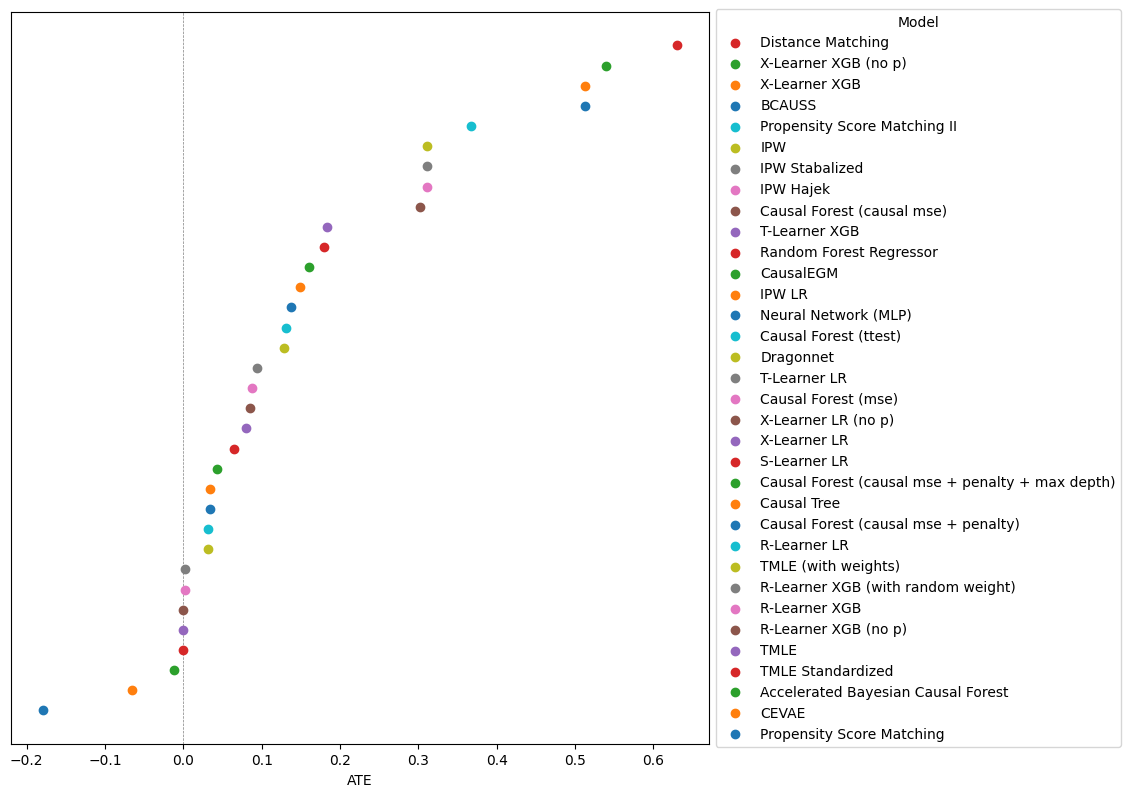

In [4]:
plt.figure(figsize=(9, 9.5))
# Add a grey line at x=0
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5, zorder=0)

bpi2017_result_sorted = bpi2017_result.sort_values(by='ATE')
#plt.scatter(bpi2017_result_sorted['ATE'], range(len(bpi2017_result_sorted)), label='Methods')

for method in bpi2017_result_sorted['method'].unique():
    plt.scatter(bpi2017_result_sorted[bpi2017_result_sorted['method'] == method]['ATE'], 
                [method] * len(bpi2017_result_sorted[bpi2017_result_sorted['method'] == method]),
                label=method)

# Add labels and title
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.xlabel('ATE')
plt.yticks([])
#plt.ylabel('Method')
#plt.title('Average Treamtent Effect (ATE) of each Model')
# Add legend to the right of the graph
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
plt.legend(handles, labels,loc='center left', bbox_to_anchor=(1, 0.5), title='Model', prop={'family': 'Times New Roman'})

plt.savefig('scatterplot_ATE.png', bbox_inches='tight')

# Show plot
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

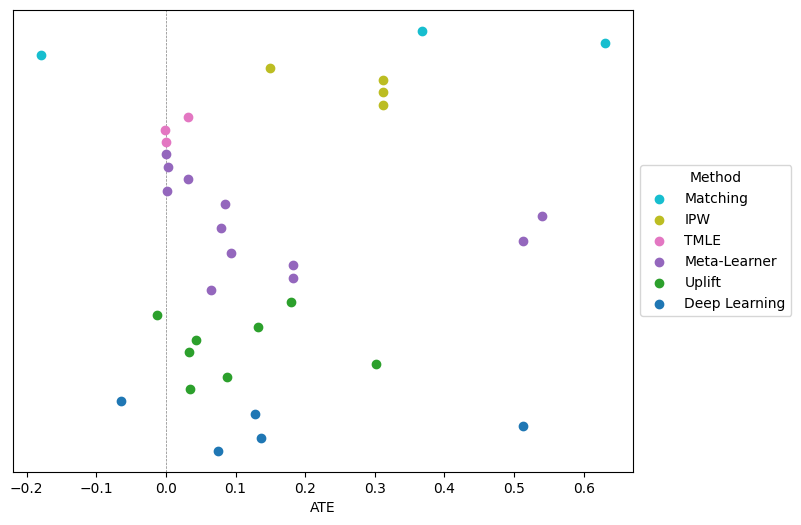

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique method types
#unique_method_types = bpi2017_result['Method Type'].unique()
unique_method_types = ['Matching', 'IPW', 'TMLE', 'Meta-Learner', 'Uplift', 'Deep Learning']
unique_method_types.reverse()

# Generate a larger set of distinct colors for method types
num_colors_needed = len(unique_method_types)
colors = plt.cm.tab10(np.linspace(0, 1, num_colors_needed))

# Scatter plot
plt.figure(figsize=(8, 6))

for i, method_type in enumerate(unique_method_types):
    method_type_data = bpi2017_result[bpi2017_result['Method Type'] == method_type]
    plt.scatter(method_type_data['ATE'], 
                method_type_data['method'],
                label=method_type, color=colors[i])

# Add labels and title
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.xlabel('ATE')
# Remove y-axis label
plt.ylabel('')
plt.yticks([])

# Add a grey line at x=0
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5, zorder=0)

# Add legend to the right of the graph
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Method', prop={'family': 'Times New Roman'})

plt.savefig('scatterplot_ATE_Method.png', bbox_inches='tight')

# Show plot
plt.show()


In [5]:
import pandas as pd
import numpy as np

# Step 1: Get indices where column "ITE" is not empty or NaN
non_empty_indices = bpi2017_result[bpi2017_result['ITE'].notna()].index

# Step 2: Check whether values at these indices are string or array
for index in non_empty_indices:
    ite = bpi2017_result.at[index, 'ITE']
    if isinstance(ite, str):
        values = [float(x) for x in re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', ite)]
    else:
        values = ite
    exec(f'minimum{index}, first_quartile{index}, median{index}, third_quartile{index}, maximum{index}, iqr{index}, upper_bound{index}, lower_bound{index} = values')
print(index)

33


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

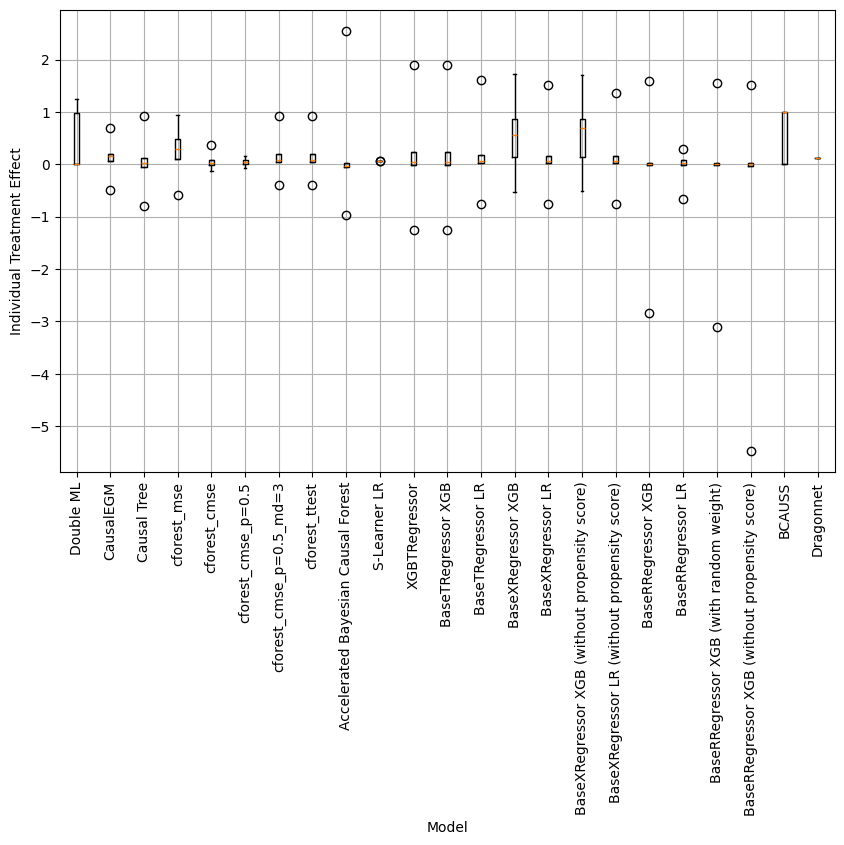

In [8]:
plt.figure(figsize=(10, 6))
y = 1
for i in non_empty_indices:
    plt.boxplot([
            globals()[f'minimum{i}'],
            globals()[f'first_quartile{i}'],
            globals()[f'median{i}'],
            globals()[f'third_quartile{i}'],
            globals()[f'maximum{i}']
        ], positions=[y], labels=[bpi2017_result.at[i, 'method']])
    y += 1
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.ylabel('Individual Treatment Effect')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('boxplot.png', bbox_inches='tight')
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

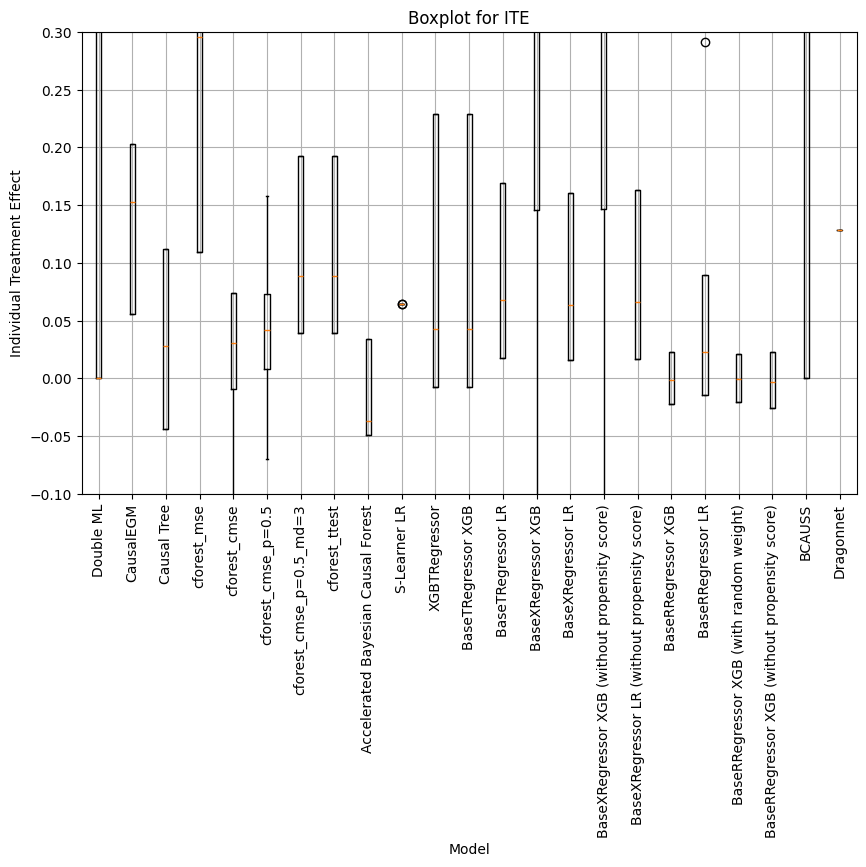

In [10]:
plt.figure(figsize=(10, 6))
y = 1
for i in non_empty_indices:
    plt.boxplot([
            globals()[f'minimum{i}'],
            globals()[f'first_quartile{i}'],
            globals()[f'median{i}'],
            globals()[f'third_quartile{i}'],
            globals()[f'maximum{i}']
        ], positions=[y], labels=[bpi2017_result.at[i, 'method']])
    y += 1
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.title('Boxplot for ITE')
plt.ylabel('Individual Treatment Effect')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylim(-0.1, 0.3)  # Limiting the y-axis range
plt.grid(True)
plt.savefig('boxplot_NearZero.png', bbox_inches='tight')
plt.show()